In [1]:
# 📦 Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load cleaned dataset
df = pd.read_csv(r"C:\\Users\\Kevin\\Desktop\\Global_health_data\\life-expectancy-prediction\\data\\cleaned\\life_expectancy_cleaned.csv")


In [2]:
# 📊 Summary Statistics
print("✅ Dataset Shape:", df.shape)

print("\n🧼 Missing Values by Column:")
print(df.isnull().sum())

print(f"\n📅 Year Range: {df['year'].min()} - {df['year'].max()}")
print(f"🌍 Unique Countries: {df['country_name'].nunique()}")

# Full statistical summary
df.describe()


✅ Dataset Shape: (13545, 8)

🧼 Missing Values by Column:
country_code                0
country_name                0
region                      0
sub-region                  0
intermediate-region      7875
year                        0
life_expectancy_women       0
life_expectancy_men         0
dtype: int64

📅 Year Range: 1960 - 2022
🌍 Unique Countries: 215


,year,life_expectancy_women,life_expectancy_men
count,13545.000000,13545.000000,13545.000000
mean,1991.000000,64.517931,59.653992
std,18.184914,17.778717,16.444545
min,1960.000000,0.000000,0.000000
25%,1975.000000,57.830000,53.850000
50%,1991.000000,69.590000,63.950000
75%,2007.000000,76.050000,69.920000
max,2022.000000,88.060000,83.350000


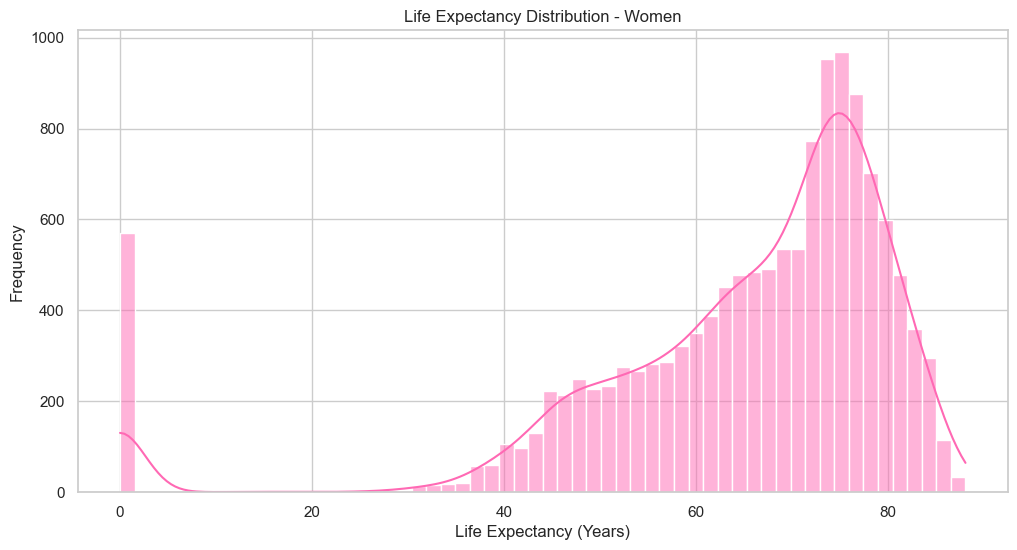

In [3]:
# 📈 Distribution of Life Expectancy - Women
sns.histplot(df["life_expectancy_women"], kde=True, color='hotpink')
plt.title("Life Expectancy Distribution - Women")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.show()


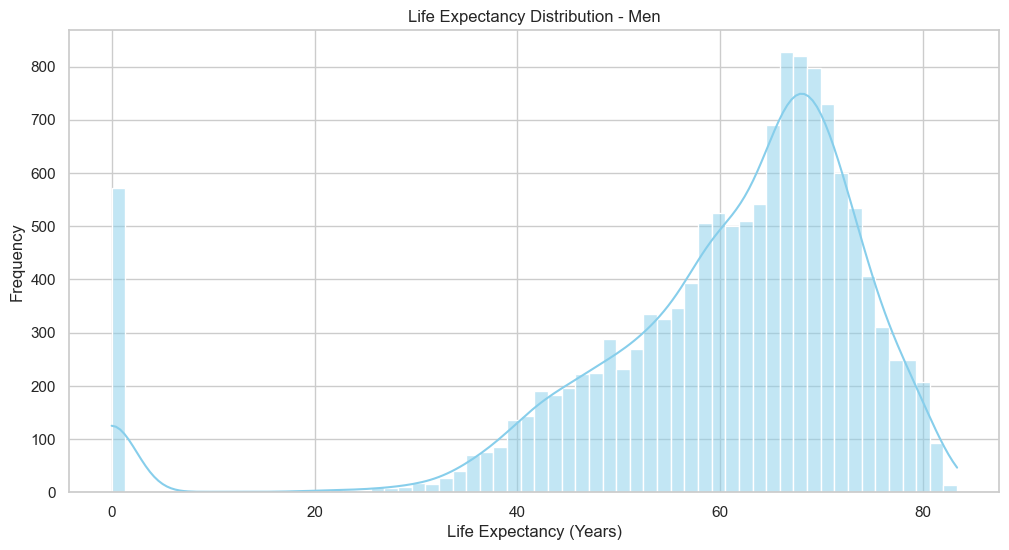

In [4]:
# 📈 Distribution of Life Expectancy - Men
sns.histplot(df["life_expectancy_men"], kde=True, color='skyblue')
plt.title("Life Expectancy Distribution - Men")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.show()


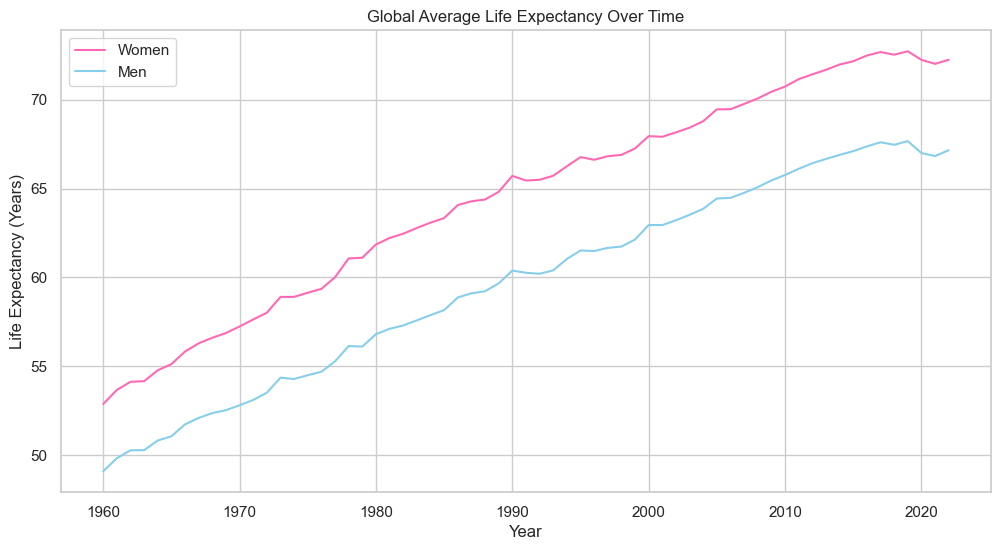

In [5]:
# 🌍 Global Trends Over Time
df_yearly = df.groupby("year")[["life_expectancy_women", "life_expectancy_men"]].mean().reset_index()

plt.plot(df_yearly["year"], df_yearly["life_expectancy_women"], label="Women", color="hotpink")
plt.plot(df_yearly["year"], df_yearly["life_expectancy_men"], label="Men", color="skyblue")

plt.title("Global Average Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.legend()
plt.grid(True)
plt.show()


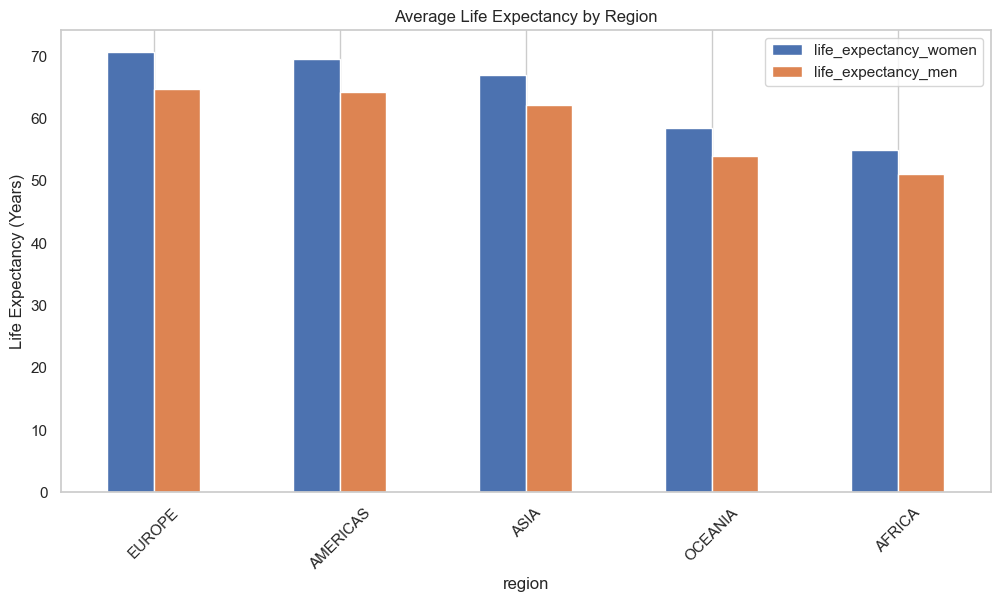

In [6]:
# 🗺️ Average Life Expectancy by Region
region_avg = df.groupby("region")[["life_expectancy_women", "life_expectancy_men"]].mean()
region_avg = region_avg.sort_values(by="life_expectancy_women", ascending=False)

region_avg.plot(kind="bar", title="Average Life Expectancy by Region", rot=45)
plt.ylabel("Life Expectancy (Years)")
plt.grid(axis='y')
plt.show()


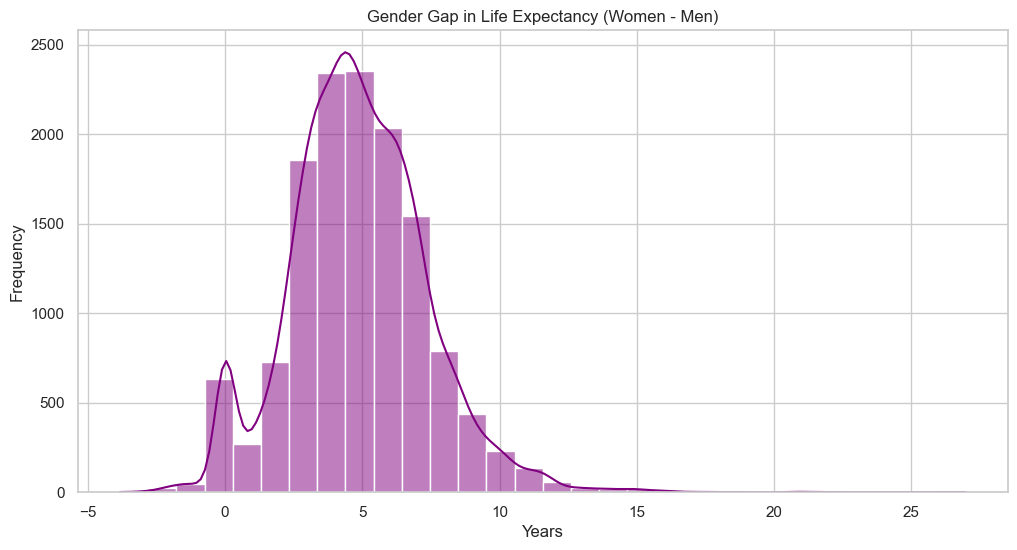

In [7]:
# ♀️ ♂️ Gender Gap in Life Expectancy
df["gender_gap"] = df["life_expectancy_women"] - df["life_expectancy_men"]

sns.histplot(df["gender_gap"], bins=30, kde=True, color='purple')
plt.title("Gender Gap in Life Expectancy (Women - Men)")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [8]:
# 🌟 Countries with High & Balanced Life Expectancy (Latest Year)
latest = df[df["year"] == df["year"].max()]
balanced = latest.copy()
balanced["gender_gap"] = abs(balanced["life_expectancy_women"] - balanced["life_expectancy_men"])

# Filter for countries where both genders live long (e.g. >80) and gap is small (e.g. <3)
healthy_balanced = balanced[
    (balanced["life_expectancy_women"] > 80) & 
    (balanced["life_expectancy_men"] > 77) & 
    (balanced["gender_gap"] < 3)
].sort_values(by="life_expectancy_women", ascending=False)

healthy_balanced[["country_name", "life_expectancy_women", "life_expectancy_men", "gender_gap"]]


,country_name,life_expectancy_women,life_expectancy_men,gender_gap
7433,LIECHTENSTEIN,85.60,83.10,2.50
6047,ISLANDIA,83.40,81.00,2.40
9764,PAÍSES BAJOS,83.20,80.30,2.90
10142,QATAR,83.10,80.63,2.47
7937,MALDIVAS,81.84,80.06,1.78
1007,BAHREIN,80.50,78.24,2.26


In [9]:
# 🕰️ Countries with High Life Expectancy in the 1960s
early = df[df["year"] <= 1970]
top_early = early.groupby("country_name")[["life_expectancy_women", "life_expectancy_men"]].mean()

# Add average column
top_early["average"] = top_early[["life_expectancy_women", "life_expectancy_men"]].mean(axis=1)

# Sort by average and show top 10
top_early.sort_values(by="average", ascending=False).head(10)


,life_expectancy_women,life_expectancy_men,average
country_name,,,
SUECIA,76.046364,71.676364,73.861364
NORUEGA,76.410000,71.119091,73.764545
ISLANDIA,76.380000,71.065455,73.722727
PAÍSES BAJOS,76.090909,71.127273,73.609091
DINAMARCA,74.918182,70.506364,72.712273
SUIZA,75.045455,69.244545,72.145000
CANADÁ,75.167273,68.742727,71.955000
REINO UNIDO,74.618182,68.463636,71.540909
NUEVA ZELANDIA,74.272727,68.372727,71.322727


In [10]:
# 📈 Countries with the Most Life Expectancy Improvement (1960 to Latest Year)
df_1960 = df[df["year"] == 1960].set_index("country_name")
df_latest = df[df["year"] == df["year"].max()].set_index("country_name")

# Keep only countries present in both years
common_countries = df_1960.index.intersection(df_latest.index)

# Calculate gain in life expectancy for both genders
improvement = pd.DataFrame(index=common_countries)
improvement["women_gain"] = df_latest.loc[common_countries]["life_expectancy_women"] - df_1960.loc[common_countries]["life_expectancy_women"]
improvement["men_gain"] = df_latest.loc[common_countries]["life_expectancy_men"] - df_1960.loc[common_countries]["life_expectancy_men"]
improvement["avg_gain"] = improvement[["women_gain", "men_gain"]].mean(axis=1)

# Top 10 countries with highest average gain
improvement.sort_values(by="avg_gain", ascending=False).head(10)


,women_gain,men_gain,avg_gain
country_name,,,
LIECHTENSTEIN,85.60,83.10,84.350
ISLAS FEROE,85.40,81.30,83.350
ISRAEL,84.80,80.70,82.750
SEYCHELLES,76.00,71.80,73.900
RIBERA OCCIDENTAL Y GAZA,75.95,71.02,73.485
GROENLANDIA,73.41,69.76,71.585
CHINA,46.72,43.85,45.285
MALDIVAS,42.75,41.99,42.370
BHUTÁN,39.74,37.99,38.865
